# ESERCIZIO: ANALISI DEL DATASET BREAST CANCER


In [1]:
import sys
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
import urllib
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

# DEFINIZIONE COSTANTI UTILI
PI=math.pi
twoPI=math.pi*2
sqrt2PI=math.sqrt(math.pi*2)
#
print("PI: ",PI, "2PI: ",twoPI, "sqrt2PI: ",sqrt2PI)

#print("Loaded Modules:")
#modules = dir() 
#print(modules)

#riferimenti 
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

PI:  3.141592653589793 2PI:  6.283185307179586 sqrt2PI:  2.5066282746310002


## Bayes Unfolding: START
### Bayes Unfolding: reading data


In [2]:
# METODO 1 : ESEGUO IL LOADING DEI DATI DAL FILE CSV 

# DIRECTORY IN CUI SI TROVA IL FILE CSV
#data_dir = './'

#data = pd.read_csv(data_dir + 'dp-export-414127.csv') # data from local file, only 4 columns

# print("data: ")
# print(data)

#print("columns: ")
#print(data.columns)

#print("data selection \n",data)

In [3]:
# METODO 2 : LOADING DATASET DA SKLEARN DATASET
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names) # data from library
data['diagnosis'] = cancer.target 
data = data[["mean radius", "mean texture", "mean smoothness", "diagnosis"]] # select these 4 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean radius      569 non-null    float64
 1   mean texture     569 non-null    float64
 2   mean smoothness  569 non-null    float64
 3   diagnosis        569 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 15.7 KB


In [4]:
# show first 10 rows
data.head(10) 

,mean radius,mean texture,mean smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


## Bayes Unfolding: data splitting and slicing
### Train Test Split:
separo il dataframe in una parte di test (20%) ed in una parte di train (80%) prendendo i record in maniera random

In [5]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=.2, random_state=41)


#### TRAIN
Il dataframe di train come si osserva di seguito è composto da 455 record

In [6]:
# TRAIN 
print("df train")
df_train

df train


,mean radius,mean texture,mean smoothness,diagnosis
475,12.83,15.73,0.09040,1
298,14.26,18.17,0.06576,1
220,13.65,13.16,0.09646,1
549,10.82,24.21,0.08192,1
567,20.60,29.33,0.11780,0
...,...,...,...,...
469,11.62,18.18,0.11750,1
407,12.85,21.37,0.07551,1
243,13.75,23.77,0.08043,1
321,20.16,19.66,0.08020,0


#### TEST
Il dataframe di test come si osserva di seguito è composto da 455 record

In [7]:
# TEST
print("df test")
df_test

df test


,mean radius,mean texture,mean smoothness,diagnosis
285,12.580,18.40,0.08393,1
347,14.760,14.74,0.08875,1
89,14.640,15.24,0.11320,1
496,12.650,18.17,0.10760,1
319,12.430,17.00,0.07557,1
...,...,...,...,...
325,12.670,17.30,0.10280,1
504,9.268,12.87,0.16340,1
396,13.510,18.89,0.10590,1
507,11.060,17.12,0.11940,1


### SLICING
#### TEST
Eseguo lo slicing del dataframe di test separando le colonne delle features (mean radius, mean texture, mean smoothness) dalla colonna del target (diagnosis)

In [8]:
# SLICING TEST
X_test = df_test.iloc[:,:-1].values # from test DataFrame: all rows & all columns except last
D_test = df_test.iloc[:,-1].values  # from test DataFrame: all rows & last column
X1_test = df_test.iloc[:,0].values  # from test DataFrame: all rows & first column
X2_test = df_test.iloc[:,1].values  # from test DataFrame: all rows & second column
X3_test = df_test.iloc[:,2].values  # from test DataFrame: all rows & third column


print("{0:<10} {1:>15}".format('dataframe', "numero record"))
print("{0:<10} {1:>15}".format("Xtest  ",len(X_test)))
print("{0:<10} {1:>15}".format("Dtest  ",len(D_test)))
print("{0:<10} {1:>15}".format("X1test  ",len(X1_test)))
print("{0:<10} {1:>15}".format("X2test  ",len(X2_test)))
print("{0:<10} {1:>15}".format("X3test  ",len(X3_test)))

dataframe    numero record
Xtest                  114
Dtest                  114
X1test                 114
X2test                 114
X3test                 114


#### TRAIN
Eseguo lo slicing del datafram di train separando le colonne delle features (mean radius, mean texture, mean smoothness) dalla colonna del target (diagnosis)

In [9]:
# SLICING TRAIN
X_train = df_train.iloc[:,:-1].values # from train DataFrame all rows & all columns except last
D_train = df_train.iloc[:,-1].values  # from train DataFrame: all rows & last column
X1_train = df_train.iloc[:,0].values  # from train DataFrame: all rows & first column
X2_train = df_train.iloc[:,1].values  # from train DataFrame: all rows & second column
X3_train = df_train.iloc[:,2].values  # from train DataFrame: all rows & third column

print("{0:<10} {1:>15}".format('dataframe', "numero record"))
print("{0:<10} {1:>15}".format("Xtrain  ",len(X_train)))
print("{0:<10} {1:>15}".format("Dtrain  ",len(D_train)))
print("{0:<10} {1:>15}".format("X1train  ",len(X1_train)))
print("{0:<10} {1:>15}".format("X2train  ",len(X2_train)))
print("{0:<10} {1:>15}".format("X3train  ",len(X3_train)))

dataframe    numero record
Xtrain                 455
Dtrain                 455
X1train                455
X2train                455
X3train                455


In [10]:
#divide train dataframe into POSITIVE AND NEGATIVE DIAGNOSIS dataframes
df_trainY = df_train.loc[df_train['diagnosis'] == 1].iloc[:,:-1].values # np array for positive diagnosis
df_trainN = df_train.loc[df_train['diagnosis'] == 0].iloc[:,:-1].values # np array for negative diagnosis

#POSITIVE TRAIN SLICING
X_trainY = df_trainY[:,:-1] # from train DataFrame all rows & all columns except last & diagnosis = Yes
D_trainY = df_trainY[:,-1]  # from train DataFrame all rows & last column & diagnosis = Yes
X1_trainY = df_trainY[:,0]  # from train DataFrame: all rows & first column & diagnosis = Yes
X2_trainY = df_trainY[:,1]  # from train DataFrame: all rows & second column & diagnosis = Yes
X3_trainY = df_trainY[:,2]  # from train DataFrame: all rows & third column & diagnosis = Yes

#NEGATIVE TRAIN SLICING
X_trainN = df_trainN[:,:-1] # from train DataFrame all rows & all columns except last & diagnosis = No
D_trainN = df_trainN[:,-1]  # from train DataFrame all rows & last column & diagnosis = No
X1_trainN = df_trainN[:,0]  # from train DataFrame: all rows & first column & diagnosis = No
X2_trainN = df_trainN[:,1]  # from train DataFrame: all rows & second column & diagnosis = No
X3_trainN = df_trainN[:,2]  # from train DataFrame: all rows & third column & diagnosis = No

print("lenght train Dataframe: ", len(df_train))
print("lenght train Y (positive): ", len(df_trainY))
print("lenght train N (negative): ", len(df_trainN))

lenght train Dataframe:  455
lenght train Y (positive):  283
lenght train N (negative):  172


### PLOTTING DATAFRAME
Di seguito sono riportati alcuni istogrammi che mostrano la distribuzione dei dati di ciascuna colonna del df di train 

#### mean radius

array([[<AxesSubplot:title={'center':'mean radius'}>]], dtype=object)

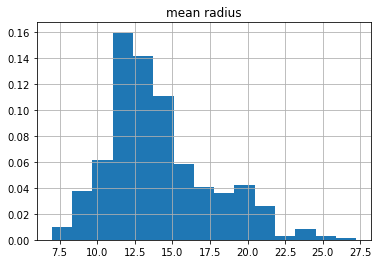

In [11]:
# ISTOGRAMMA
nbins = 15 #definisco il numero di bin

df_train.hist(column='mean radius',bins=nbins,density=1)
#df_ax = df_train.hist(column='mean radius',by=df_train['diagnosis'],bins=nbins,density=1)

#### mean texture

array([[<AxesSubplot:title={'center':'mean texture'}>]], dtype=object)

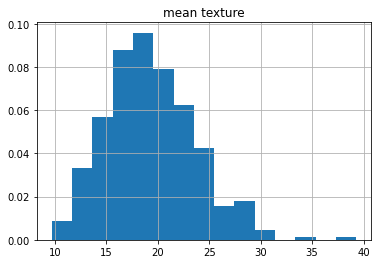

In [12]:
df_train.hist(column='mean texture',bins=nbins,density=1)
#df_ax = df_train.hist(column='mean radius',by=df_train['diagnosis'],bins=nbins,density=1)

#### mean smoothness

array([[<AxesSubplot:title={'center':'mean smoothness'}>]], dtype=object)

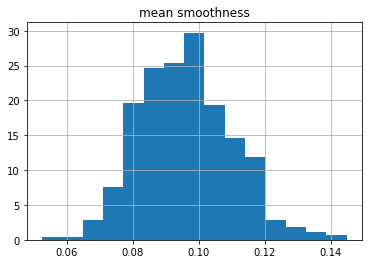

In [13]:
df_train.hist(column='mean smoothness',bins=nbins,density=1)
#df_ax = df_train.hist(column='mean radius',by=df_train['diagnosis'],bins=nbins,density=1)

### FITTING
Eseguo un fit gaussiano 

#### X1_train: mean radius

mu0:  14.081408791208792  sigma0:  3.42863665019255
mu1:  12.158342756183746  sigma1:  1.8046161732332104
mu2:  17.245523255813957  sigma2:  3.105285678453434


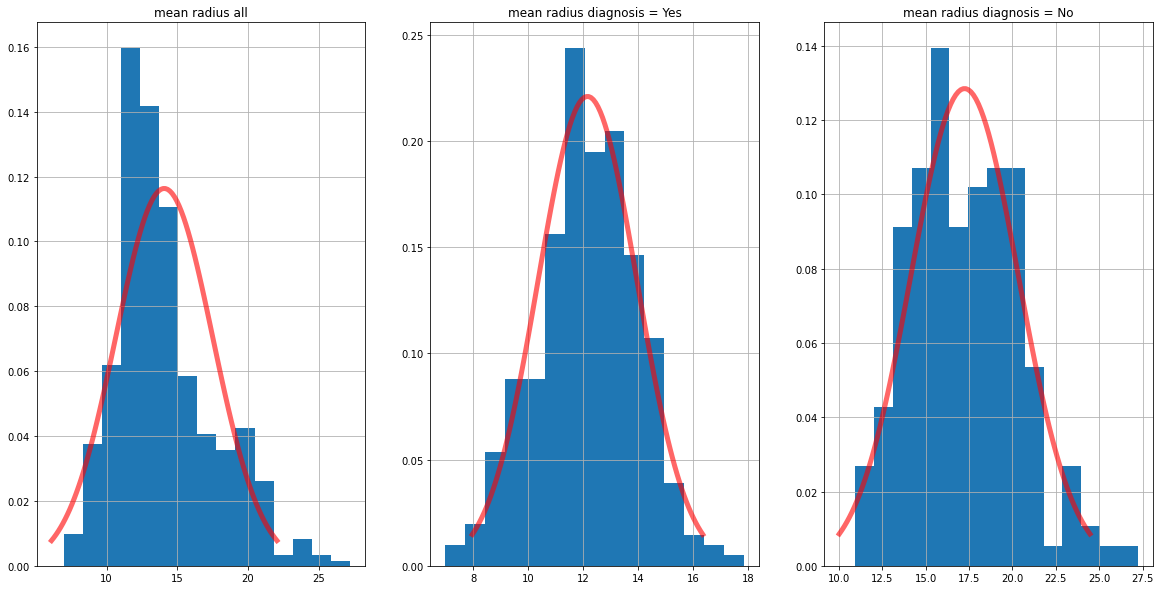

In [14]:
plt.figure(figsize=(20, 10))

ax0=plt.subplot(1, 3, 1)
bin_heights, bin_borders, _ = ax0.hist(X1_train,bins=nbins,density=True)
plt.grid(visible='True')
mu0, sigma0 = norm.fit(X1_train)
print("mu0: ",mu0," sigma0: ",sigma0)
g_x = np.linspace(norm.ppf(0.01,mu0,sigma0),norm.ppf(0.99,mu0,sigma0), 100)
ax0.plot(g_x, norm.pdf(g_x,mu0,sigma0),'r-', lw=5, alpha=0.6, label='norm pdf')
ax0.set_title('mean radius all')


ax1=plt.subplot(1, 3, 2)
bin_heights, bin_borders, _ = ax1.hist(X1_trainY,bins=nbins,density=True)
plt.grid(visible='True')
mu1, sigma1 = norm.fit(X1_trainY)
print("mu1: ",mu1," sigma1: ",sigma1)
g_x = np.linspace(norm.ppf(0.01,mu1,sigma1),norm.ppf(0.99,mu1,sigma1), 100)
ax1.plot(g_x, norm.pdf(g_x,mu1,sigma1),'r-', lw=5, alpha=0.6, label='norm pdf')
ax1.set_title('mean radius diagnosis = Yes')


ax2=plt.subplot(1, 3, 3)
bin_heights, bin_borders, _ = ax2.hist(X1_trainN,bins=nbins,density=True)
plt.grid(visible='True')
mu2, sigma2 = norm.fit(X1_trainN)
print("mu2: ",mu2," sigma2: ",sigma2)
g_x = np.linspace(norm.ppf(0.01,mu2,sigma2),norm.ppf(0.99,mu2,sigma2), 100)
ax2.plot(g_x, norm.pdf(g_x,mu2,sigma2),'r-', lw=5, alpha=0.6, label='norm pdf')
ax2.set_title('mean radius diagnosis = No')

plt.show()


#### X2_train: mean texture

mu0:  19.31775824175824  sigma0:  4.298580321073201
mu1:  18.01590106007067  sigma1:  4.0940130576252365
mu2:  21.459767441860464  sigma2:  3.731730995796251


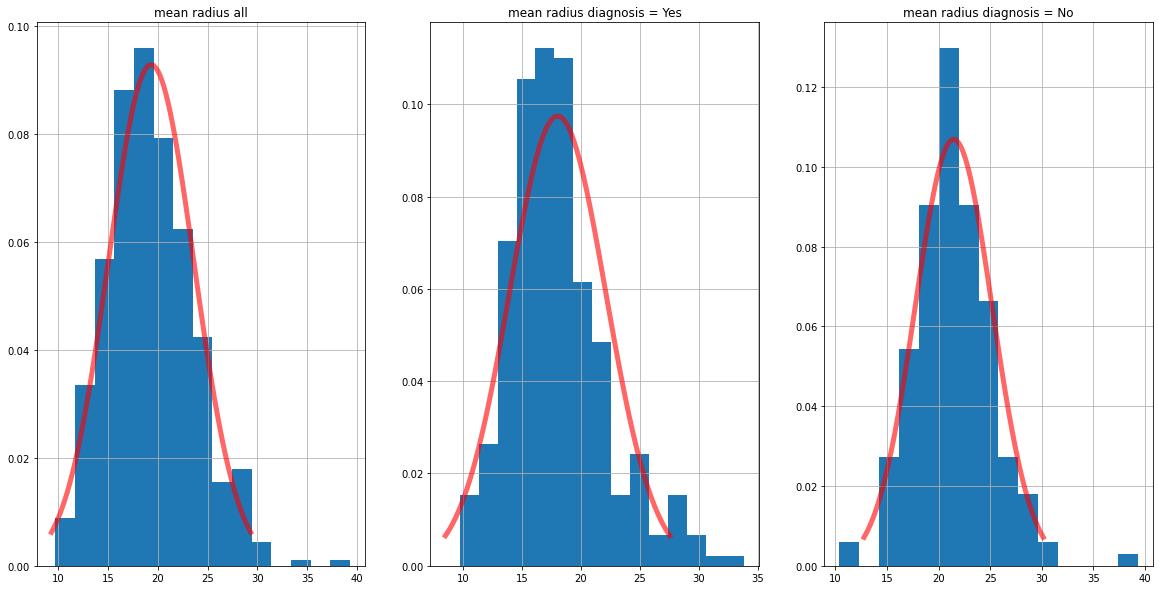

In [15]:
plt.figure(figsize=(20, 10))

ax0=plt.subplot(1, 3, 1)
bin_heights, bin_borders, _ = ax0.hist(X2_train,bins=nbins,density=True)
plt.grid(visible='True')
mu0, sigma0 = norm.fit(X2_train)
print("mu0: ",mu0," sigma0: ",sigma0)
g_x = np.linspace(norm.ppf(0.01,mu0,sigma0),norm.ppf(0.99,mu0,sigma0), 100)
ax0.plot(g_x, norm.pdf(g_x,mu0,sigma0),'r-', lw=5, alpha=0.6, label='norm pdf')
ax0.set_title('mean radius all')


ax1=plt.subplot(1, 3, 2)
bin_heights, bin_borders, _ = ax1.hist(X2_trainY,bins=nbins,density=True)
plt.grid(visible='True')
mu1, sigma1 = norm.fit(X2_trainY)
print("mu1: ",mu1," sigma1: ",sigma1)
g_x = np.linspace(norm.ppf(0.01,mu1,sigma1),norm.ppf(0.99,mu1,sigma1), 100)
ax1.plot(g_x, norm.pdf(g_x,mu1,sigma1),'r-', lw=5, alpha=0.6, label='norm pdf')
ax1.set_title('mean radius diagnosis = Yes')


ax2=plt.subplot(1, 3, 3)
bin_heights, bin_borders, _ = ax2.hist(X2_trainN,bins=nbins,density=True)
plt.grid(visible='True')
mu2, sigma2 = norm.fit(X2_trainN)
print("mu2: ",mu2," sigma2: ",sigma2)
g_x = np.linspace(norm.ppf(0.01,mu2,sigma2),norm.ppf(0.99,mu2,sigma2), 100)
ax2.plot(g_x, norm.pdf(g_x,mu2,sigma2),'r-', lw=5, alpha=0.6, label='norm pdf')
ax2.set_title('mean radius diagnosis = No')

plt.show()


#### X3_train: mean smoothness

mu0:  0.09613632967032967  sigma0:  0.01384336740226794
mu1:  0.09178809187279152  sigma1:  0.012734753840167123
mu2:  0.10329069767441859  sigma2:  0.01256283919275487


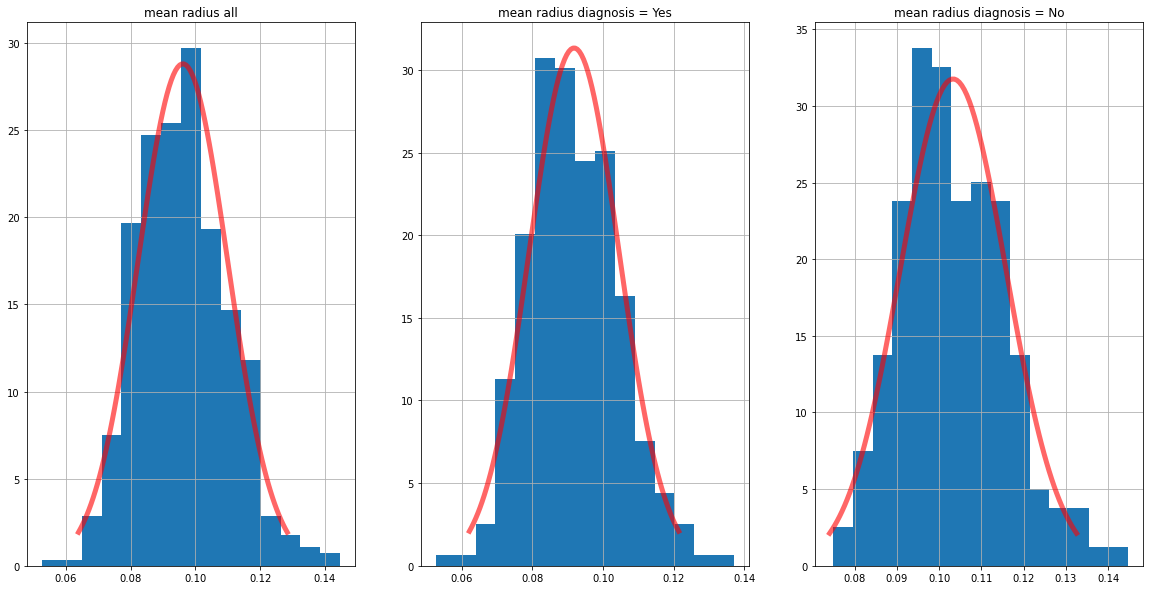

In [16]:
plt.figure(figsize=(20, 10))

ax0=plt.subplot(1, 3, 1)
bin_heights, bin_borders, _ = ax0.hist(X3_train,bins=nbins,density=True)
plt.grid(visible='True')
mu0, sigma0 = norm.fit(X3_train)
print("mu0: ",mu0," sigma0: ",sigma0)
g_x = np.linspace(norm.ppf(0.01,mu0,sigma0),norm.ppf(0.99,mu0,sigma0), 100)
ax0.plot(g_x, norm.pdf(g_x,mu0,sigma0),'r-', lw=5, alpha=0.6, label='norm pdf')
ax0.set_title('mean radius all')


ax1=plt.subplot(1, 3, 2)
bin_heights, bin_borders, _ = ax1.hist(X3_trainY,bins=nbins,density=True)
plt.grid(visible='True')
mu1, sigma1 = norm.fit(X3_trainY)
print("mu1: ",mu1," sigma1: ",sigma1)
g_x = np.linspace(norm.ppf(0.01,mu1,sigma1),norm.ppf(0.99,mu1,sigma1), 100)
ax1.plot(g_x, norm.pdf(g_x,mu1,sigma1),'r-', lw=5, alpha=0.6, label='norm pdf')
ax1.set_title('mean radius diagnosis = Yes')


ax2=plt.subplot(1, 3, 3)
bin_heights, bin_borders, _ = ax2.hist(X3_trainN,bins=nbins,density=True)
plt.grid(visible='True')
mu2, sigma2 = norm.fit(X3_trainN)
print("mu2: ",mu2," sigma2: ",sigma2)
g_x = np.linspace(norm.ppf(0.01,mu2,sigma2),norm.ppf(0.99,mu2,sigma2), 100)
ax2.plot(g_x, norm.pdf(g_x,mu2,sigma2),'r-', lw=5, alpha=0.6, label='norm pdf')
ax2.set_title('mean radius diagnosis = No')

plt.show()


### DEFINIZIONE DELL'ALGORITMO
Definisco le funzioni necessarie per eseguire il calcolo delle probabilità

In [17]:
#PRIOR
def calc_prior(df, Y):
    """ Funzione che calcola le Prior P(Y=1) e P(Y=0)"""
  
    diag_val = sorted(list(df[Y].unique())) # [0, 1] valori possibili di "diagnosis"
    prior_out = []
    for val in diag_val:
        prior_out.append(len(df[df[Y]==val])/len(df)) 

    return prior_out

In [18]:
# PROBABILITA CONDIZIONATA: prob X dato Y 
def calc_prob_x_dato_y(df, X_name, X_val, Y, label):
    """ Funzione che calcola la prob condizionata di X dato Y """
    
    df = df[df[Y]==label] # seleziono i dati per i quali la diagnosi è uguale aL label (0 o 1)
    
    mean = df[X_name].mean() #media
    std = df[X_name].std()  #dev standard
    
    #PROBABILITA CONDIZIONATA (GAUSSIANA)
    probX_Y = (1 / (sqrt2PI * std)) * np.exp(-((X_val-mean)**2 / (2 * std**2 )))
    
    return probX_Y

Verifico la corretta normalizzazione

In [19]:
#calcolo le prior 
prior = calc_prior(df=df_train, Y='diagnosis')
diag_val = [0,1]
#Normalizzazione
Nprior = 0
for i in range(2):
    print(f"prior[{i}]: {prior[i]}")
    Nprior += prior[i]

print(f"Nprior : {Nprior}")


prior[0]: 0.378021978021978
prior[1]: 0.621978021978022
Nprior : 1.0


Text(0.5, 0.98, 'Bayes Unf')

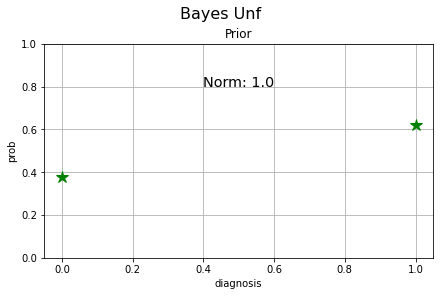

In [20]:
#PLOTTING DELLA PRIOR
fig2, axs2 = plt.subplots(1, 1,constrained_layout=True)

# asse x: valori diagnosi(0,1) 
# asse y: valori della prior
axs2.plot(diag_val, prior, color='g', linestyle="None", marker='*', markersize=12)

#setup dei label del grafico
axs2.set_title('Prior')
axs2.set_xlabel('diagnosis')
axs2.set_ylabel('prob')

#setup del range dell'asse y
axs2.set_ylim(0.,1.)

#label definizione e plot
s1 = 'Norm: ' + str(Nprior)
plt.text(0.4,0.8,s1,fontsize='x-large')

#griglia del grafico
axs2.grid()

#titolo del grafico
fig2.suptitle('Bayes Unf', fontsize=16)

### APPLICAZIONE DEL TEOREMA DI BAYES
Definisco la funzione che applica il teorema di Bayes ed estrae la predizione dei valori della variabile traget "diagnosis"

#### CASO 1: USO DI UNA SINGOLA FEATURE 

In [21]:
#DEFINIZIONE ALGORITMO
def Bayes_Gaussian_single_feature(df, X, feature, Y):
    """Funzione che estrae le predizioni per i valori della diagnosis utilizzando una sola feature"""

    #1. CALCOLO LA PRIOR UTILIZZANDO LA FUNZIONE PRECEDENTEMENTE DEFINITA
    prior = calc_prior(df, Y)
    print(f"prior: {prior}")
    
    
    #inizializzazione variabili
    my_y_pred=[] #inizializzo la lista che conterrà i valori predetti della variabile target
    
    
    for row in X: # per ogni record del mio dataframe di training
        
        #2. LIKELIHOOD: CALCOLATA UTILIZZANDO LA PROB CONDIZIONATA PRECEDENTEMENTE DEFINITA
        #inizializzazione variabili
        labels = sorted(list(df[Y].unique())) # [0,1] lista con i 2 valori del target possibili  
        likelihood = [1,1] # lista con una coppia di valori per ogni record del df 
        
        for j in range(len(labels)): # per ogni valore del target diagnosis (0 o 1)
            likelihood[j] *= calc_prob_x_dato_y(df=df, X_name=feature, X_val=row , Y=Y, label=labels[j])               

            
        #3. POSTERIOR
        #inizializzazione variabili necessarie
        posterior = [1,1] # lista con una coppia di valori per ogni record del df
        posterior_norm = 0.  #inizializzo la var normalizzazione


        for j in range(len(labels)): # per ogni valore della var target (0 o 1) 
            posterior[j] = likelihood[j] * prior[j]  #  post_prob[0/1] = likelihood[0/1] * prior[0/1]
            posterior_norm += likelihood[j] * prior[j]   #  normalizzazione = likelihood[0]*prior[0] + likelihood[1]*prior[1]

        my_posterior = posterior / posterior_norm

        #4. PREDIZIONE
        #la predizione della variabile target Diagnosis (0 o 1) sarà data dall'indice associato alla probabilità maggiore:
        # numpy.argmax() : Returns the indices of the maximum values along an axis.
        my_y_pred.append(np.argmax(my_posterior))  
         
    return np.array(my_y_pred)


##### Predizione usando MEAN RADIUS

prior: [0.378021978021978, 0.621978021978022]
X1 accuracy     0.9298245614035088
X1 f1           0.9473684210526315
X1 confusion matrix: 
 [[34  6]
 [ 2 72]]


<AxesSubplot:>

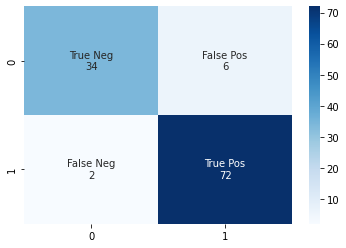

In [22]:
# MEAN RADIUS
D_pred_X1 = Bayes_Gaussian_single_feature(df=df_train, X=X1_test, feature="mean radius", Y="diagnosis") #BAYES: questa è la posterior sul database di test

X1_accuracy_score = accuracy_score(D_test,D_pred_X1,normalize=True)
X1_confusion_matrix = confusion_matrix(D_test, D_pred_X1)
X1_f1_score = f1_score(D_test, D_pred_X1)

print("{0:<15} {1:>15}".format('X1 accuracy',X1_accuracy_score))
print("{0:<15} {1:>15}".format('X1 f1',X1_f1_score))
print("X1 confusion matrix: \n",X1_confusion_matrix)

#PLOT CONFUSION MATRIX
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                X1_confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(X1_confusion_matrix, annot=labels, fmt="", cmap="Blues")

##### Predizione usando MEAN TEXTURE

prior: [0.378021978021978, 0.621978021978022]
X2 accuracy     0.7631578947368421
X2 f1           0.8343558282208589
X2 confusion matrix: 
 [[19 21]
 [ 6 68]]


<AxesSubplot:>

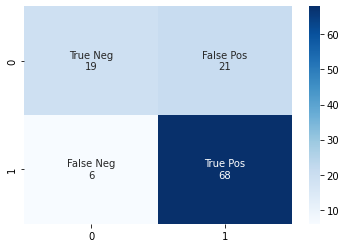

In [23]:
# MEAN TEXTURE
D_pred_X2 = Bayes_Gaussian_single_feature(df_train, X=X2_test, feature="mean texture", Y="diagnosis") #BAYES: questa è la posterior sul database di test

X2_accuracy_score = accuracy_score(D_test,D_pred_X2,normalize=True)
X2_confusion_matrix = confusion_matrix(D_test, D_pred_X2)
X2_f1_score = f1_score(D_test, D_pred_X2)

print("{0:<15} {1:>15}".format('X2 accuracy',X2_accuracy_score))
print("{0:<15} {1:>15}".format('X2 f1',X2_f1_score))
print("X2 confusion matrix: \n",X2_confusion_matrix)

#PLOT CONFUSION MATRIX
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                X2_confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(X2_confusion_matrix, annot=labels, fmt="", cmap="Blues")

##### Predizione usando  MEAN SMOOTHNESS

prior: [0.378021978021978, 0.621978021978022]
X3 accuracy     0.6228070175438597
X3 f1           0.7189542483660132
X3 confusion matrix: 
 [[16 24]
 [19 55]]


<AxesSubplot:>

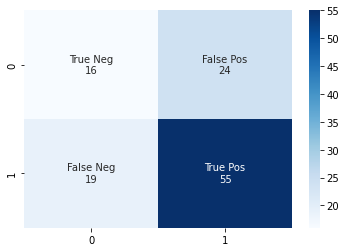

In [24]:
# MEAN SMOOTHNESS
D_pred_X3 = Bayes_Gaussian_single_feature(df_train, X=X3_test, feature="mean smoothness", Y="diagnosis") #BAYES: questa è la posterior sul database di test

X3_accuracy_score = accuracy_score(D_test,D_pred_X3,normalize=True)
X3_confusion_matrix = confusion_matrix(D_test, D_pred_X3)
X3_f1_score = f1_score(D_test, D_pred_X3)

print("{0:<15} {1:>15}".format('X3 accuracy',X3_accuracy_score))
print("{0:<15} {1:>15}".format('X3 f1',X3_f1_score))
print("X3 confusion matrix: \n",X3_confusion_matrix)

#PLOT CONFUSION MATRIX
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                X3_confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(X3_confusion_matrix, annot=labels, fmt="", cmap="Blues")

#### CASO 2: UTILIZZO TUTTE E 3 LE FEATURES PER PREDIRE IL TARGET DIAGNOSIS

In [25]:
# ADATTAMENTO DELL'ALGORITMO AL CASO DI PIU FEATURES
def Bayes_Gaussian(df, X, Y):
    """Funzione che estrae le predizioni per i valori della diagnosis utilizzando le 3 feature a disposizione"""

    #lista delle features (nel mio caso sono 3: mean radius, mean texture, mean smoothness)
    features = list(df.columns)[:-1]
    print("features: ",features)
    print("numero di features: ", len(features))

    
    #1. CALCOLO LA PRIOR UTILIZZANDO LA FUNZIONE PRECEDENTEMENTE DEFINITA
    prior = calc_prior(df, Y)
    print(f"prior: {prior}")
    
    
    #inizializzazione variabili
    my_y_pred=[] #inizializzo la lista che conterrà i valori predetti della variabile target
    
    
    for row in X: # per ogni record del mio dataframe di training
        
        #inizializzazione variabili
        labels = sorted(list(df[Y].unique())) # [0,1] lista con i 2 valori del target possibili  
        likelihood = [1, 1]
        
        #2. LIKELIHOOD: CALCOLATA UTILIZZANDO LA PROB CONDIZIONATA PRECEDENTEMENTE DEFINITA
        for j in range(len(labels)): # per ogni valore del target diagnosis (0 o 1)
            for i in range(len(features)): # e per ogni features calcolo la prob condizionata e ne faccio il prodotto
                likelihood[j] *= calc_prob_x_dato_y(df=df, X_name=features[i], X_val=row[i], Y=Y, label=labels[j])               

        #3. POSTERIOR
        #inizializzazione variabili necessarie
        posterior = [1, 1]
        posterior_norm = 0.  #inizializzo la var normalizzazione


        for j in range(len(labels)): # per ogni valore della var target (0 o 1) 
            posterior[j] = likelihood[j] * prior[j]  #  post_prob[0/1] = likelihood[0/1] * prior[0/1]
            posterior_norm += likelihood[j] * prior[j]   #  normalizzazione = likelihood[0]*prior[0] + likelihood[1]*prior[1]

        my_posterior = posterior / posterior_norm

        #4. PREDIZIONE
        #la predizione della variabile target Diagnosis (0 o 1) sarà data dall'indice associato alla probabilità maggiore:
        # numpy.argmax() : Returns the indices of the maximum values along an axis.
        my_y_pred.append(np.argmax(my_posterior))
        
    return np.array(my_y_pred)

### PREDIZIONE NEL CASO DI PIU FEATURES

features:  ['mean radius', 'mean texture', 'mean smoothness']
numero di features:  3
prior: [0.378021978021978, 0.621978021978022]
my accuracy     0.9649122807017544
my f1           0.9736842105263158
my confusion matrix: 
 [[36  4]
 [ 0 74]]


<AxesSubplot:>

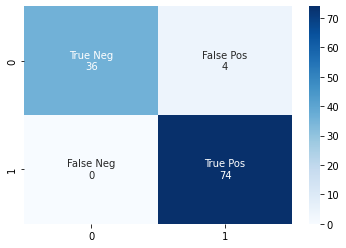

In [26]:
D_pred = Bayes_Gaussian(df=df_train, X=X_test, Y="diagnosis") #BAYES: questa è la posterior sul database di test

my_accuracy_score = accuracy_score(D_test,D_pred,normalize=True)
my_confusion_matrix = confusion_matrix(D_test, D_pred)
my_f1_score = f1_score(D_test, D_pred)

print("{0:<15} {1:>15}".format('my accuracy',my_accuracy_score))
print("{0:<15} {1:>15}".format('my f1',my_f1_score))
print("my confusion matrix: \n",my_confusion_matrix)

#PLOT CONFUSION MATRIX
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                my_confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(my_confusion_matrix, annot=labels, fmt="", cmap="Blues")

Come si osserva confrontando gli scores, si ha il punteggio migliore (prossimo a 1) nel caso di uso di tutte e tre le feature rispetto al caso in cui si è usata una sola feature.

## Confronto i risultati ottenuti con i risultati calcolati tramite l'algoritmo implementato direttamente in sklearn

accuracy 0.9649122807017544
f1_score 0.9736842105263158
confusion matrix 
 [[36  4]
 [ 0 74]]


<AxesSubplot:>

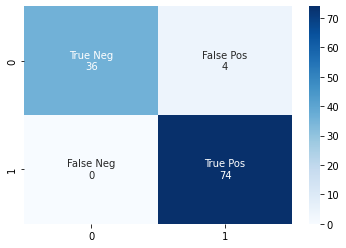

In [27]:
#CALCOLO USANDO IL MODULO FORNITO DA SKLEARN
gnb = GaussianNB()
Dpredicted = gnb.fit(X_train, D_train).predict(X_test)
res_accuracy_score = accuracy_score(D_test,Dpredicted,normalize=True)
res_confusion_matrix = confusion_matrix(D_test, Dpredicted)
res_f1_score = f1_score(D_test, Dpredicted)
print(f"accuracy {res_accuracy_score}")
print(f"f1_score {res_f1_score}")
print(f"confusion matrix \n {res_confusion_matrix}")

#PLOT CONFUSION MATRIX
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                res_confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(res_confusion_matrix, annot=labels, fmt="", cmap="Blues")